In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets
import datetime
import pandas as pd

In [2]:
!nvidia-smi

Tue Nov 26 10:42:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0             15W /   75W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
tensorflow_datasets.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

In [4]:
print("oxford_flowers102" in tensorflow_datasets.list_builders())

True


In [5]:
(train_data, validation_data, test_data), ds_info = tensorflow_datasets.load(name = "oxford_flowers102",
                                                                             split = ["train", "validation", "test"],
                                                                             shuffle_files = True,
                                                                             with_info = True,
                                                                             as_supervised = True)

In [6]:
len(train_data), len(test_data), len(validation_data)

(1020, 6149, 1020)

In [7]:
ds_info.features, ds_info.name

(FeaturesDict({
     'file_name': Text(shape=(), dtype=string),
     'image': Image(shape=(None, None, 3), dtype=uint8),
     'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
 }),
 'oxford_flowers102')

In [8]:
class_names = ds_info.features['label'].names
class_names

['pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold',
 'tiger lily',
 'moon orchid',
 'bird of paradise',
 'monkshood',
 'globe thistle',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',

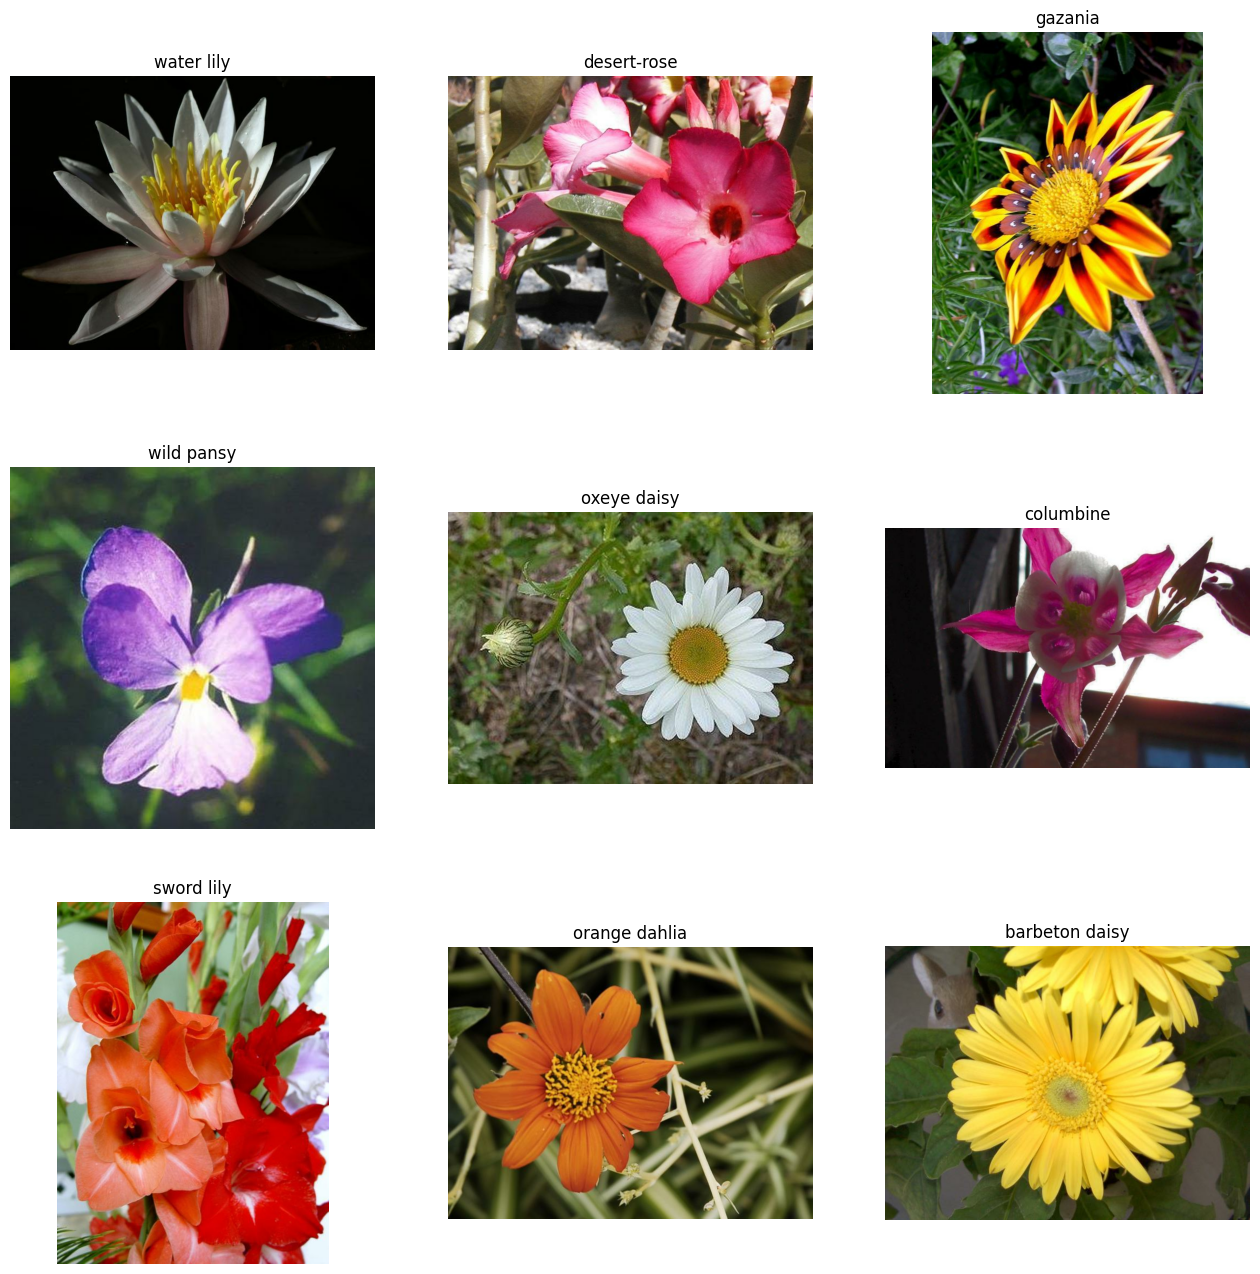

In [9]:
set_of_nine = train_data.take(9)
plt.figure(figsize = (16, 16))
i = 1
for img, label in set_of_nine:
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')
    i += 1

In [10]:
def preprocess_fun_img_preprocess(img, label, img_shape = 224):
    img = tf.image.resize(img, [img_shape, img_shape])
    return tf.cast(img, tf.float32), label

In [11]:
img

<tf.Tensor: shape=(500, 667, 3), dtype=uint8, numpy=
array([[[46, 48, 47],
        [45, 47, 46],
        [43, 45, 44],
        ...,
        [46, 67, 24],
        [46, 67, 24],
        [45, 66, 23]],

       [[48, 50, 49],
        [47, 49, 48],
        [45, 47, 46],
        ...,
        [45, 66, 23],
        [44, 65, 22],
        [43, 64, 21]],

       [[52, 54, 53],
        [51, 53, 52],
        [48, 50, 49],
        ...,
        [46, 64, 22],
        [45, 63, 21],
        [44, 62, 20]],

       ...,

       [[49, 55, 19],
        [49, 55, 19],
        [50, 56, 20],
        ...,
        [33, 24, 17],
        [49, 35, 26],
        [62, 44, 32]],

       [[50, 56, 20],
        [51, 57, 21],
        [52, 58, 22],
        ...,
        [41, 32, 25],
        [57, 43, 34],
        [70, 52, 40]],

       [[53, 59, 23],
        [55, 61, 25],
        [57, 63, 27],
        ...,
        [45, 36, 29],
        [61, 47, 38],
        [74, 56, 44]]], dtype=uint8)>

In [12]:
preprocess_fun_img_preprocess(img, label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[46.243305, 48.243305, 47.243305],
         [42.020626, 44.020626, 43.020626],
         [43.328125, 45.328125, 42.328125],
         ...,
         [42.328144, 63.328144, 20.328142],
         [41.      , 62.      , 19.      ],
         [44.756687, 65.75669 , 22.756687]],
 
        [[53.555805, 55.555805, 54.555805],
         [45.79179 , 47.79179 , 44.858757],
         [41.      , 43.      , 40.      ],
         ...,
         [43.848213, 61.848213, 19.848215],
         [45.7248  , 63.7248  , 21.7248  ],
         [44.998306, 62.998306, 20.998304]],
 
        [[56.918747, 56.918747, 56.75803 ],
         [52.305344, 52.38301 , 50.150013],
         [46.377235, 47.377235, 42.377235],
         ...,
         [49.292377, 67.21202 , 25.212019],
         [52.191475, 70.111115, 28.111116],
         [50.069187, 67.98883 , 25.98883 ]],
 
        ...,
 
        [[45.839294, 54.919647, 23.678589],
         [44.919647, 54.919647, 19.953129]

In [13]:
train_data = train_data.map(map_func = preprocess_fun_img_preprocess, num_parallel_calls = tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

validation_data = validation_data.map(map_func = preprocess_fun_img_preprocess, num_parallel_calls = tf.data.AUTOTUNE)
validation_data = validation_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data = test_data.map(map_func = preprocess_fun_img_preprocess, num_parallel_calls = tf.data.AUTOTUNE)
test_data = test_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)



In [14]:
train_data, validation_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [15]:
from tensorflow.keras import mixed_precision

In [16]:
mixed_precision.global_policy()

<Policy "float32">

In [17]:
base_model = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model.trainable = False

input = tf.keras.layers.Input(shape=(224, 224, 3), name = "Input_layer")
x = base_model(input, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "Global_Average_pooling")(x)
output = tf.keras.layers.Dense(len(class_names), activation = "softmax", name = "Dense_layer")(x)

Model = tf.keras.Model(input, output)

In [18]:
Model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [19]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 Global_Average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 Dense_layer (Dense)         (None, 102)               130662    
                                                                 
Total params: 6,049,974
Trainable params: 130,662
Non-trainable params: 5,919,312
_________________________________________________________________


In [20]:
for layer in Model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000244FDC497E0> True
<keras.engine.functional.Functional object at 0x00000244FDCA4A00> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x00000244977F37C0> True
<keras.layers.core.dense.Dense object at 0x000002455A4CBBB0> True


In [21]:
for layer in base_model.layers:
    print(layer)

In [22]:
model_checkpoint_dir = 'oxford_flowers_callbacks/model_checkpoint'

In [23]:
Model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_dir,
                                                      monitor = "val_accuracy",
                                                      save_weights_only = True,
                                                      verbose = 1,
                                                      save_best_only = True)

In [24]:
def tensorboard_callback(dir, model_experiment):
    log_dir = dir + "/" + model_experiment + "/" + datetime.datetime.now().strftime("%d%m%y-%H%M%S")
    call = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
    return call

In [25]:
initial_epochs = 10
history= Model.fit(train_data,
                        validation_data = validation_data,
                        epochs = initial_epochs,
                        validation_steps = int(0.5 * len(validation_data)),
                        callbacks = [tensorboard_callback(dir = "oxford_flower_model", model_experiment = "model_one")])

Epoch 1/10
32/32 [==============================] - 15s 180ms/step - loss: 4.2892 - accuracy: 0.1216 - val_loss: 3.5260 - val_accuracy: 0.4570
Epoch 2/10
32/32 [==============================] - 4s 120ms/step - loss: 2.8752 - accuracy: 0.6833 - val_loss: 2.6959 - val_accuracy: 0.6562
Epoch 3/10
32/32 [==============================] - 4s 122ms/step - loss: 1.9535 - accuracy: 0.8833 - val_loss: 1.9966 - val_accuracy: 0.7754
Epoch 4/10
32/32 [==============================] - 4s 121ms/step - loss: 1.3614 - accuracy: 0.9343 - val_loss: 1.6591 - val_accuracy: 0.8027
Epoch 5/10
32/32 [==============================] - 4s 121ms/step - loss: 0.9934 - accuracy: 0.9608 - val_loss: 1.4533 - val_accuracy: 0.8145
Epoch 6/10
32/32 [==============================] - 4s 120ms/step - loss: 0.7467 - accuracy: 0.9755 - val_loss: 1.2650 - val_accuracy: 0.8359
Epoch 7/10
32/32 [==============================] - 4s 120ms/step - loss: 0.5803 - accuracy: 0.9882 - val_loss: 1.1874 - val_accuracy: 0.8398
Epoch

<AxesSubplot: >

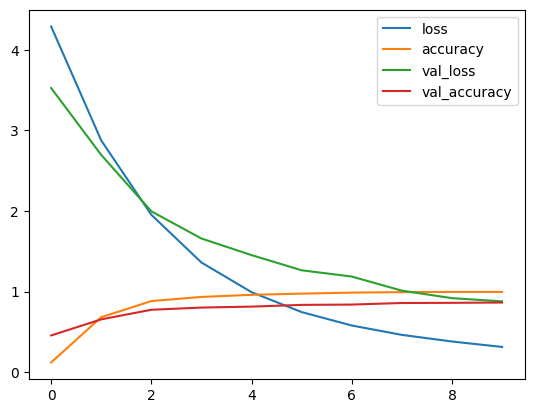

In [26]:
pd.DataFrame(history.history).plot()